# Unsupervised Learning Solution
### EDSA - Movie Recommendation 2023 
#### SmartByte - team JM2 EDSA

© Explore Data Science Academy

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2Fbca114f2e4f6b9b46f2cc76527d7401e%2FImage_header.png?generation=1593773828621598&alt=media" width=100%/> 

<a id="cont"></a>
## Table of Content

<a href=#one>1. Introduction</a>
       
<a href=#two>1. Import Packages</a>

<a href=#three>2. Load Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)<a>
    
<a href=#five>5. Data Processing</a>

<a href=#six>6. Feature Engineering</a>

<a href=#seven>7. Modelling</a>

<a href=#eight>8. Model Performance</a>

<a href=#nine>9. Saving & Exporting Model</a>

<a href=#ten>10. Conclusion</a>

<a href=#eleven>11. Recommendation</a>

<a href=#ref>Reference Document Links</a>

<a id="one"></a>
# 1. INTRODUCTION
<a href=#cont>Back to Table of Contents</a>

#### 1.1 Introduction

In the modern world heavily influenced by technology, recommender systems play a crucial role in enabling individuals to make better choices about the content they consume. This is particularly evident in movie recommendations, where advanced algorithms can assist viewers in discovering excellent films from a vast selection. Therefore, we will develop a recommendation algorithm that combines content-based and collaborative filtering techniques to accurately predict how a user might rate a movie they haven't seen before, based on their past preferences.

<img src="https://miro.medium.com/max/1400/1*odvftNNQJp3O6vpwmZsJOQ.png" width=50%/> 

#### 1.2 Problem Statement

In today's world, several prominent companies dominate various industries, including YouTube, Facebook, Twitter, Netflix, Amazon, LinkedIn, and Google. These giants share a common thread: the utilization of recommendation systems. In the era of Artificial Intelligence, nearly every sector, from government and education to the rapidly expanding entertainment industry, relies heavily on AI technology to enhance their effectiveness.

Therefore, our objective as Smartbyte, is to develop a precise and resilient model that tackles this significant economic opportunity. By implementing our solution, users within our clients' system will enjoy personalized recommendations, fostering a strong connection with the streaming services that best cater to their viewing preferences. This, in turn, will enhance platform affinity among their audience.

####  1.3 Required Installations

In [2]:
 !pip install surprise

In [3]:
!pip install fuzzywuzzy

In [4]:
 !pip install WordCloud

In [5]:
 !pip install plotly

#### 1.4.  Our Approach

![1*rCK9VjrPgpHUvSNYw7qcuQ@2x.png](https://miro.medium.com/max/1000/1*rCK9VjrPgpHUvSNYw7qcuQ@2x.png)

Recommender systems encompass a class of techniques and algorithms that can suggest 'relevant' items to users, in our case, movies. They predict future behaviour based on past data and a combination of multiple algorithms.

We will commence by building;

* A `Content-Based Recommendation System` which entails computing the similarity between items(`movies`) using the consine similarity to plot similarity matrix between movies and similiaarity in content expressed as movie index. meaning we will be considering `Item Contents` such as (Tags, Keyword, Cast, Genre, the nitigrities etc) 

* Then Several `Collaborative Filtering Recommendation Systems` which harness all `Past data` of user interactions with the movies they have watch and ratings they have made both directly (actually rating the movie) or indirectly (i.e how long they dwelled on the movie).

So, Let's Proceed

<a id="two"></a>
# 2. IMPORT PACKAGES
<a href=#cont>Back to Table of Contents</a>

In this section, we will be importing libraries which are a collections of modules in their classes and based on their functionality. For this Analysis and Modelling, we wil be requiring;

   ` For Data Manupulation, libraries such as Pandas, Numpy etc.`
   
`For Data Visualization, libraries such as mathplotlib, seaborn`
    
`libraries for data prepartion, feature selection, model building, Performance Calculation and more.`

**SEE** in-line comments BELOW for purpose per importation.

In [6]:
""" 
For a seamless run, 
All required libraries will be imported here. 
"""

# Libraries for data loading, data manipulation and data visulisation
import pandas as pd                                                   # <-- for loading CSV data
import numpy as np                                                    # <-- Used for mathematical operations
import matplotlib.pyplot as plt                                       # <-- for Graphical Representation                                                 
import seaborn as sns                                                 # <-- for specialized plots                                                         
import scipy as sp                                                    # <-- Used in our code for numerical efficientcy. 
import plotly.express as px                                           # <-- for specialized plots  
from PIL import Image
from wordcloud import WordCloud, STOPWORDS                            # <-- To Check most pertinent parts of textual data
sns.set()                                                             # <-- set plot style

# Libraries for data preparation
from datetime import datetime
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet
from mpl_toolkits.mplot3d import Axes3D
import re
from scipy.sparse import csr_matrix

# Libraries for featurization and similarity computation
from surprise.accuracy import rmse
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
from sklearn.pipeline  import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, Normalizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from fuzzywuzzy import fuzz

# Libraries for Model Building
import surprise
from surprise import Reader, Dataset, SVD
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

# Libraries used during sorting procedures.
import operator                                                       # <-- Convienient item retrieval during iteration 
import heapq                                                          # <-- Efficient sorting of large lists

# Libraries for calculating performance metrics
import time
from surprise.model_selection import cross_validate
from surprise.accuracy import rmse
from surprise import accuracy

# Libraries to Save/Restore Models
import pickle                                                         # <-- To Export Model
from surprise import dump                                             # <-- Aids dump model to be saved as PKL.
import os

import gc                                                             # <-- Gabage Collector
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="three"></a>
# 3. Load Data
<a href=#cont>Back to Table of Contents</a>

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems.

We'll be using this special version of the MovieLens dataset which is enriched with additional data, and resampled for fair evaluation purposes.

**Source**

The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

**Supplied Files**

* `genome_scores.csv` - a score mapping the strength between movies and tag-related properties.
* `genome_tags.csv` - user assigned tags for genome-related scores
* `imdb_data.csv` - Additional movie metadata scraped from IMDB using the links.csv file.
* `links.csv` - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* `sample_submission.csv` - Sample of the submission format for the hackathon.
* `tags.csv` - User assigned for the movies within the dataset.
* `test.csv` - The test split of the dataset. Contains user and movie IDs with no rating data.
* `train.csv` - The training split of the dataset. Contains user and movie IDs with associated rating data.

Kindly Make Reference to [Kaggle](https://www.kaggle.com/competitions/edsa-movie-recommendation-2022/data) for More Information asa concern the data.

In [7]:
# #Download dataset
# ! kaggle competitions download -c edsa-movie-recommendation-2022

# #Unzip datasets
# ! mkdir datasets
# !unzip  edsa-movie-recommendation-2022.zip

In [8]:
# Load Base Train & Test Data locally
train = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/train.csv')
test = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/test.csv')
genome_scores = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv')
genome_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv')
imdb_data = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv')
links= pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/links.csv')
movies = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/movies.csv')
tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/tags.csv')

# # From Kaggle
# train_df = pd.read_csv(r'train.csv')
# test_df = pd.read_csv(r'test.csv')

<a id="four"></a>
# 4. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. On the following EDA we will explore the **MovieLens Dataset** to check for insight. We will be carrying out an extensive data analysis, descriptive statistics and data visualisations, all in the bid to give us an idea of what useful part of the data will be preprocessed in the Data Processing & feature engineering section in preparation for modeling. 

##### 4.1 Review Loaded Data

This first and the most important step in this project as a proper understanding on the data available will increase the chances of what we can do with it.

In [9]:
train

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
10000033,136395,99114,5.0,1521235092
10000034,140078,553,3.0,1002580977
10000035,154807,56782,4.0,1227674807
10000036,85805,327,4.0,1479921530


Our Base training Model Includes `userId`, `movieId` , `rating` , `timestamp`. All features are relevant to a variable degree, but we can't make conclusive decisions yet

Average rating in dataset: 3.5333951730983424


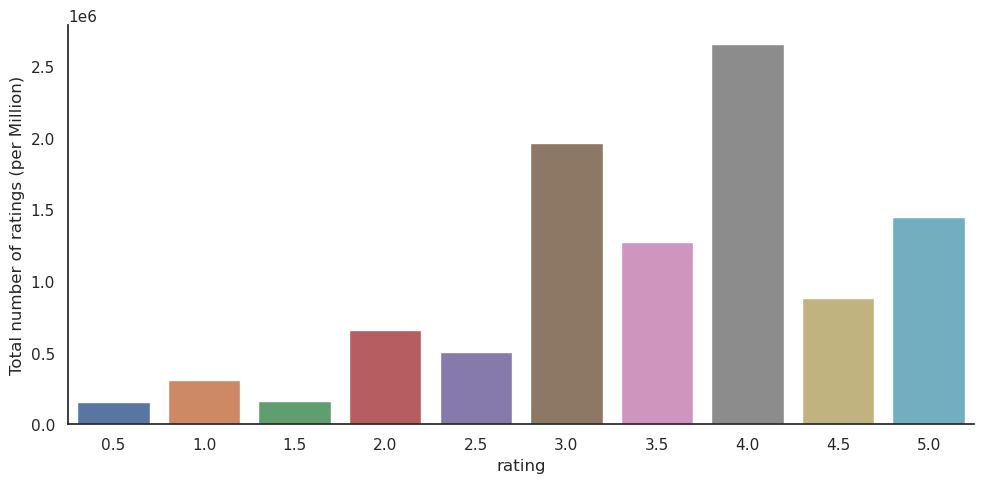

In [10]:
# Let's Visualise the Distribution of Rating in our Actual Train Data
with sns.axes_style('white'):
    g = sns.catplot( x = 'rating', y = None, data = train, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings (per Million)")
print (f'Average rating in dataset: {np.mean(train["rating"])}')

In [11]:
# Establishing Range of Ratings
min_rating = train.rating.min()
max_rating = train.rating.max()
print(f'The RATING ranges between {min_rating} and {max_rating}')

The RATING ranges between 0.5 and 5.0


So we have our ITEM (Movies) rating ranging between `0.5` to `5.0` and most likely to be the target feature for Basic Recommendation i.e. if we are to recommend based on `userId` and `movieId` iteractions alone. 

Also as we can see, majority of our Observations fall within the RATING range of `3.0` and `5.0` with `4.0` having the highest occurance with over `2.6 Million rating occurance`. This means that modelling by rating alone will not be entirely be representative of what the viewer may want since majority of ratings fall within the higher rates. Movie Contents/Types, User Preferences and other collaborative options, will have to be called into actions as distinguishing factor to tailoring down a recommendation to a user specification, which is what we want.

In [12]:
# Check the shape/sizes of the data sets
"""" 
Creating a DataFrame which outlines the sizes of each of our data
"""

# List Names of Data sets
D_names = ['Train Data', 'Test Data','Genome Score', 'Tags Data', 
       'links Data', 'Movies Data', 'IMDB Data', 'Genome Tags' ]
# Generate a list of each data size
sizes = [len(train), len(test), len(genome_scores), 
         len(tags), len(links), len(movies), len(imdb_data),
         len(genome_tags), ]
# Place & view result in Pandas DataFrame
size_df = pd.DataFrame(list(zip(D_names, sizes)), columns=['Data', 'Size'])
size_df

,Data,Size
0,Train Data,10000038
1,Test Data,5000019
2,Genome Score,15584448
3,Tags Data,1093360
4,links Data,62423
5,Movies Data,62423
6,IMDB Data,27278
7,Genome Tags,1128


We have`10 million plus` observations for training & validation, and `5 Million plus` of Test data to act as Unseen/Real world Test case.

`Genome Scores` which is a score mapping the strength between movies and tag-related properties being over `15 Million Plus` in size. This is a whole lot of Data set to manipulate through; First relating the Database, Cleaning and Processing it and finally modelling, for which each model generates its own form of sparse matrix, factorizing the interactions between the relevant features and proferring the desired recommendation. This will no doubt be computationally intensive. e.g assumming each feature in the genome score were to be applied and a sparse matrix were to be created between the features, we will be looking at a matrix in the shape of 15 million x 15 million, Now that is prior to integrating it to other tables. This is alot and have to be managed with utmost care. 

We will have to adopt some form of `DIMENSIONALITY REDUCTION` to Reducing the number of features but yet retaining the data integrity( No Loss in Insight to a reasonable Degree)

Let's Lokk at some relevant availble dataset first adopt what features are essential to our operation

In [13]:
"""
Reviewing Dataset
"""
# To enable us view the full value of dataframe
pd.set_option('display.max_colwidth', -1)     

# View the first 5 entries in each dataset
print('TRAIN DATA TABLE'), display(train)
print('MOVIES DATA TABLE'), display(movies)
print('IMDB DATA TABLE'), display(imdb_data)
print('TAG DATA TABLE'), display(tags)

TRAIN DATA TABLE


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
10000033,136395,99114,5.0,1521235092
10000034,140078,553,3.0,1002580977
10000035,154807,56782,4.0,1227674807
10000036,85805,327,4.0,1479921530


MOVIES DATA TABLE


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


IMDB DATA TABLE


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Margret|Burgess Meredith|Daryl Hannah|Kevin Pollak|Katie Sagona|Ann Morgan Guilbert|James Andelin|Marcus Klemp|Max Wright|Cheryl Hawker|Wayne A. Evenson|Allison Levine,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Mykelti Williamson|Michael Beach|Leon|Wendell Pierce|Donald Faison|Jeffrey D. Sams|Jazz Raycole|Brandon Hammond|Kenya Moore,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betrayal|mother son relationship
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
...,...,...,...,...,...,...
27273,131254,Franz Dinda|Florian Lukas|Axel Stein|Kailas Mahadevan|Christian Sengewald|Till Trenkel|Oona-Devi Liebich|Ronald Nitschke|Carsten Norgaard|Jan Henrik Stahlberg|Maren Scheel|Michael Brandner|Michael Dorn|Jean-Luc Julien|Sonya Kraus,Carsten Funke,85.0,NaN,man wrapped in a towel|man wears a thong|male rear nudity|male nudity
27274,131256,Rick Kavanian|Axel Stein|Eva Habermann|Christoph M. Ohrt|Jonas Gruber|Andreas Elsholz|Thorsten Feller|Herbert Fux|Imke Brügger|Karl-Heinz Dickmann|Saskia de Lando|Uwe Freyer|Hans Martin Stier|Malwine Möller|Alexa Sommer,Matthias Dinter,83.0,"DEM5,800,000",ski|ski resort|ampersand in title|drink in title
27275,131258,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeong Lee|Tae-woo Kim|Cheol-min Park|Won-hae Kim|Dal-hwan Jo|Jeong-geun Shin|Sulli Choi|Yi-Kyeong Lee|Dal-su Oh|Nae-sang Ahn|Hie-bong Jo|Sung-hwa Jung,Seong-il Cheon,130.0,NaN,pirate|sword fight|korea|bandit
27276,131260,Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta Salminen|Eeva-Maija Haukinen|Esko Nikkari|Pertti Koivula|Hannu Kivioja|Martti-Mikael Järvinen|Tom Lindholm|Raimo Grönberg|Kunto Ojansivu|Harry Viita|Mikko Kivinen|Seppo Sallinen,Timo Koivusalo,102.0,NaN,friend|friendship|television show|restaurant


TAG DATA TABLE


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
...,...,...,...,...
1093355,162521,66934,Neil Patrick Harris,1427311611
1093356,162521,103341,cornetto trilogy,1427311259
1093357,162534,189169,comedy,1527518175
1093358,162534,189169,disabled,1527518181


(None, None)

It's established that the THREE MOST Important Features here are the; `MovieId`, `UserId` and `Rating` Hence will look to Build on this

1. From the Movies Table:
Obviously the `genres` is will be an important ingredient to establish Movie Content; Viewers might be more interested in `Comedy` and not recommending movies having `ROMANCE` as a genre to CHILDREN. We could be sued for that. In Total we have availble over `62 thousand` distinct movies available for our training.

2. From the IMDB Table: 
we can see, People/Users may tend to watch movies based on their `CAST` or `Director` but predominately the CAST and most people may be drawn to more `fight` oriented movies than `cowboy` or `animation`. Thus We will look to pick the `Title_cast` & `plot_keywords` Columns as potential features

3. The `Timestamp` might prove important as varying individuals will tend to view certain `tag` of movies at unique times and as such we should have our model providing recommendation to suit the TIMING (Think of HORROR movies and Night-times). This table may be having good info that could positively influence our training model

That been said, Let's go into more statistical Review of our Dataset.

In [14]:
# Some Descriptive Stats of our base train data
round(train['rating'].describe(), 1)

count    10000038.0
mean     3.5       
std      1.1       
min      0.5       
25%      3.0       
50%      3.5       
75%      4.0       
max      5.0       
Name: rating, dtype: float64

A Maximum of 25% of our viewers will tend to rate movies below 3.0 `i.e over 75% of People, according to our stats will tend to rate a movie above 3.0`. This is also visualized in the `RATING DISTRIBUTION BAR GRAPH`

In [15]:
#Let's Count the Unique Characters for our features of Interest


# Declare count of unique entries for features
unique_users = len(train['userId'].unique().tolist())
unique_movies = len(movies['movieId'].unique().tolist())
unique_actors = len(imdb_data['title_cast'].unique().tolist())
unique_directors = len(imdb_data['director'].unique().tolist())
unique_Movie_tags = len(tags['tag'].unique().tolist())

# Output Result in Dataframe
unique_characters = pd.DataFrame({"Users": [unique_users],
                                  "Tags" : [unique_Movie_tags],
                                  "Movies": [unique_movies],
                                  "Actors" : [unique_actors],
                                  "Directors" : [unique_directors],
                                 }, 
                                index=['Count of Unique Characters'])

# Print result
display(unique_characters.transpose())

,Count of Unique Characters
Users,162541
Tags,73051
Movies,62423
Actors,17144
Directors,11787


For our experiment; we have a total of `162,541` participants in the rating of `62,423` unique movies. This is a pinch of vast number of movies and possible users but this is a reasonable satisfactory to fulfil the agenda of this project which to Model a Recommendation Machine which acts based on several conditions to tailoring down recommendations to suit each user.

Let's EXPLORE FURTHER on our USER, ITEM, and possibly TIMING or any other factor of great light. The scope this EDA is really vast and not limited to the reasearch as recorded on this NOTEBOOK.

#### Further about our USERS

visualising the dataframes with user information

In [16]:
# Find the number of times a user has rated, create a data frame with the count by userId
train_user = pd.DataFrame(
    train['userId'].value_counts()).reset_index()
train_user.rename(columns={'index':'userId','userId':'count'},
                  inplace=True)
train_user.head()

,userId,count
0,72315,12952
1,80974,3680
2,137293,3588
3,33844,3208
4,20055,3050


In [17]:
## Grouping users by count within range

##Create DataFrame with count by userID
user_count = pd.DataFrame(train['userId'].value_counts()).reset_index()
user_count.rename(columns={'index':'userId','userId':'count'}, inplace=True)

# Defining Group Between 1 - 50
first_group = user_count.loc[(user_count['count'] > 0) &                     
            (user_count['count'] < 50), 'userId'].value_counts().sum()
# Between 50 - 500
second_group = user_count.loc[(user_count['count'] >= 50) &  
            (user_count['count'] < 500), 'userId'].value_counts().sum()
# Between 500 - 1000
third_group = user_count.loc[(user_count['count'] >= 500) & 
            (user_count['count'] < 1000), 'userId'].value_counts().sum()
# Between 1000 - 1500
fourth_group = user_count.loc[(user_count['count'] >= 1000) & 
            (user_count['count'] < 1500), 'userId'].value_counts().sum()
# From 1500 above
fifth_group = user_count.loc[(user_count['count'] >= 1500),
            'userId'].value_counts().sum()

# To give us insight in the spread, we used figures to determine the spread.
trial_error = np.array([['First Group', first_group, 'Between 1 and 50'],
                        ['Second Group', second_group, 'Between 50 and 500'],
                        ['Third Group', third_group, 'Between 500 and 1000'],
                        ['Fourth Group', fourth_group, 'Between 1000 and 1500'],
                        ['Fifth Group', fifth_group, 'Greater than 1500']])

# Place array into Dataframe
trial_error_df = pd.DataFrame({'UserId Voting Group': trial_error[:, 0],
                               'Number per Group': trial_error[:, 1],
                               'Group Category': trial_error[:, 2]})
# Plot Bar Graph of Groupings
fig = px.bar(trial_error_df, x=trial_error_df["UserId Voting Group"], 
             y=trial_error_df["Number per Group"], color=trial_error_df["UserId Voting Group"], 
             title='Users Rating Distribution')
fig.show()
trial_error_df

,UserId Voting Group,Number per Group,Group Category
0,First Group,110010,Between 1 and 50
1,Second Group,50973,Between 50 and 500
2,Third Group,1338,Between 500 and 1000
3,Fourth Group,159,Between 1000 and 1500
4,Fifth Group,61,Greater than 1500


From the above; we can see out of `162,541` participants; `Over 110,000 of them Rated below 50 times` which is over 67% of the the participants. Meaning, which is as representative as whats occuring in reality as just about `33% of people who see a movie will tend to Rate them`, we are assuming, rating over 50 movies for a given season will be termed ACTIVE. This is purely a Hypothetical, based on this data and should pass over several hypothesis testing to factualize this looming facts.

What this simply means; `You are most likely to get feedbacks from 33% of your Customers`.

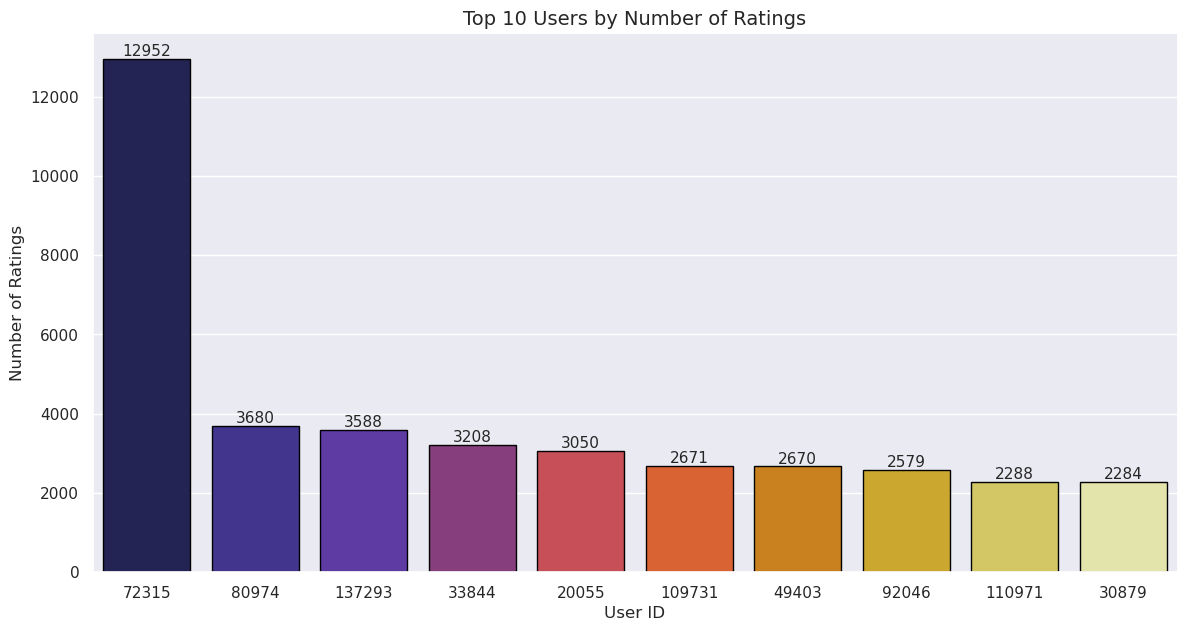

In [18]:
# Define Function that Reveals Users with Top Counts of Ratings
def user_ratings_count(df, n):
    plt.figure(figsize=(14,7))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    plt.show()

user_ratings_count(train,10)

Here we intended finding out our top contributors and above is our result; 

Our Top Users each rated on an average of about `2900 Times` except for User with `ID: 72315`. It's eitherour User with `ID: 72315` Practically spends his/her time on movies and rating them or we have some form of an Outlier here.  We wil assume this to be an Outlier, hence removing Rows having this Users contribution. SEE Data Processing for Execution.

In [19]:
# Find the number of times a specific rating has been assigned, created a data frame with the count by rating.
train_rating = pd.DataFrame(
    train['rating'].value_counts()).reset_index()
train_rating.rename(
    columns={'index': 'rating', 'rating': 'count'}, inplace=True)
train_rating.head(10)

,rating,count
0,4.0,2652977
1,3.0,1959759
2,5.0,1445230
3,3.5,1270642
4,4.5,880516
5,2.0,656821
6,2.5,505578
7,1.0,311213
8,1.5,159731
9,0.5,157571


In [20]:
fig = px.bar(train_rating, x=train_rating['rating'],
             y=train_rating['count'],
             color=train_rating['rating'],
             title='Distribution by Rating')
fig.show()

#### Further about our MOVIES

Using the Train Data as Base let's seive out just whats needed from other Movies & Metadata to trim off alot of Excess data. Recall we have to deal with space and computational challanges. This will fit every essential inot the 10 million Observations,. This is still alot to deal with, but its a good start.  

First we Merge our Movie Title & Genres from our movie Table to Our Base Train Data.

**Merging the datasets**

In [21]:
# Let us merge our train data with the movies data

pd.set_option('display.max_colwidth', -1)   # To enable us view the full value of dataframe
movies = pd.merge(train, movies, on='movieId', how='left')
movies

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002),Action|Comedy|Sci-Fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,833375837,"Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)",Drama|Horror|Mystery|Thriller
...,...,...,...,...,...,...
10000033,136395,99114,5.0,1521235092,Django Unchained (2012),Action|Drama|Western
10000034,140078,553,3.0,1002580977,Tombstone (1993),Action|Drama|Western
10000035,154807,56782,4.0,1227674807,There Will Be Blood (2007),Drama|Western
10000036,85805,327,4.0,1479921530,Tank Girl (1995),Action|Comedy|Sci-Fi


In [22]:
#dataframe for average rating
avg_movie_df = movies.groupby('title')['rating'].mean().sort_values(ascending = False).reset_index().rename(columns= {'rating': 'average_rating'})
movies_ranting_count = movies.groupby('title')['rating'].count().sort_values(ascending = True).reset_index().rename(columns= {'rating': 'rating_count'})
#meging the two dataframes
movies_rating_count_df = movies_ranting_count.merge(round(avg_movie_df,0), on= 'title')
movies_rating_count_df

,title,rating_count,average_rating
0,"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",1,3.0
1,Love's Coming (2014),1,2.0
2,Love's Brother (2004),1,2.0
3,Love's Abiding Joy (2006),1,4.0
4,Love on the Dole (1941),1,3.0
...,...,...,...
48146,"Matrix, The (1999)",29014,4.0
48147,"Silence of the Lambs, The (1991)",29444,4.0
48148,Pulp Fiction (1994),31697,4.0
48149,Forrest Gump (1994),32383,4.0


<Axes: xlabel='rating', ylabel='Count'>

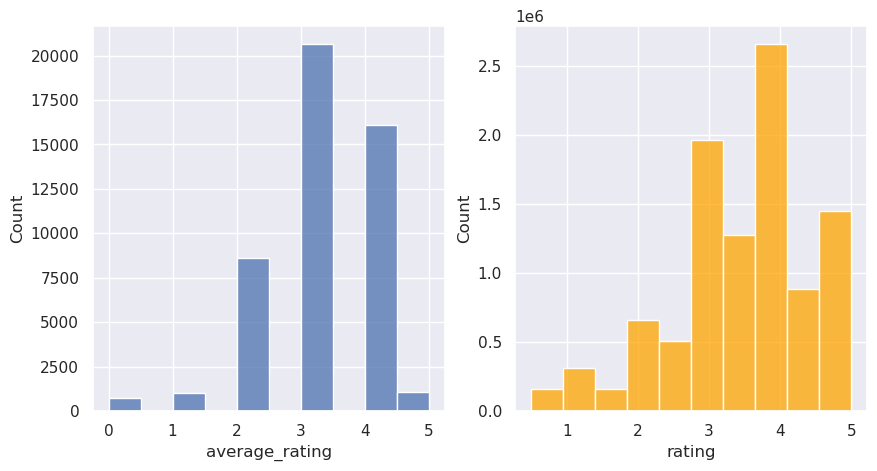

In [23]:
plt.figure(figsize =(10,5))
plt.subplot(1,2, 1)
sns.histplot(data= movies_rating_count_df, x= 'average_rating', bins = 10)
plt.subplot(1,2, 2)
sns.histplot(data= movies, x= 'rating', bins = 10, color= 'orange')

NEXT: we add our Cast, Director, runtime, budget and Plot_keywords from our IMDB DATA into our MAIN TRAIN DATA

In [24]:
# We will add an additional data i.e df_imdb data
complt_movie = pd.merge(movies, imdb_data[['movieId', 'title_cast', 
                                                'director', 'plot_keywords']], 
                                                  on='movieId', how='left')
complt_movie

,userId,movieId,rating,timestamp,title,genres,title_cast,director,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjour|Mark Donovan|Ann Elsley|Colin Farrell|Jean-Marc Favorin|Ralph Fiennes|Brendan Gleeson|Eric Godon|Zeljko Ivanek|Sachi Kimura|Anna Madeley|Louis Nummy|Clémence Poésy,Martin McDonagh,dwarf|bruges|irish|hitman
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony,Albert Hackett,fatherhood|doberman|dog|mansion
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002),Action|Comedy|Sci-Fi,Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn Boyle|Johnny Knoxville|Rosario Dawson|Tony Shalhoub|Patrick Warburton|Jack Kehler|David Cross|Colombe Jacobsen-Derstine|Peter Spellos|Michael Rivkin|Michael Bailey Smith|Lenny Venito,Lowell Cunningham,lingerie|michael jackson character|shorthaired woman|calzone
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime,Sandra Bullock|Regina King|Enrique Murciano|William Shatner|Ernie Hudson|Heather Burns|Diedrich Bader|Treat Williams|Abraham Benrubi|Nick Offerman|Eileen Brennan|Elisabeth Röhm|Leslie Grossman|Lusia Strus|Molly Gottlieb,Marc Lawrence,female protagonist|cleave gag|good woman|fbi
4,9041,366,3.0,833375837,"Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)",Drama|Horror|Mystery|Thriller,Jeff Davis|Heather Langenkamp|Miko Hughes|Matt Winston|Rob LaBelle|David Newsom|Wes Craven|Marianne Maddalena|Gretchen Oehler|Tracy Middendorf|Cully Fredricksen|Bodhi Elfman|Sam Rubin|Robert Englund|Claudia Haro,Wes Craven,freddy krueger|elm street|famous director as himself|alternate reality
...,...,...,...,...,...,...,...,...,...
10000033,136395,99114,5.0,1521235092,Django Unchained (2012),Action|Drama|Western,Jamie Foxx|Christoph Waltz|Leonardo DiCaprio|Kerry Washington|Samuel L. Jackson|Walton Goggins|Dennis Christopher|James Remar|David Steen|Dana Gourrier|Nichole Galicia|Laura Cayouette|Ato Essandoh|Sammi Rotibi|Clay Donahue Fontenot,Quentin Tarantino,racial vengeance|racial violence|historically inaccurate|sadism
10000034,140078,553,3.0,1002580977,Tombstone (1993),Action|Drama|Western,Kurt Russell|Val Kilmer|Sam Elliott|Bill Paxton|Powers Boothe|Michael Biehn|Charlton Heston|Jason Priestley|Jon Tenney|Stephen Lang|Thomas Haden Church|Dana Delany|Paula Malcomson|Lisa Collins|Dana Wheeler-Nicholson,Kevin Jarre,wyatt earp character|two gun holster|double gun holster|tucson arizona
10000035,154807,56782,4.0,1227674807,There Will Be Blood (2007),Drama|Western,Daniel Day-Lewis|Martin Stringer|Matthew Braden Stringer|Jacob Stringer|Joseph Mussey|Barry Del Sherman|Harrison Taylor|Stockton Taylor|Paul F. Tompkins|Dillon Freasier|Kevin Breznahan|Jim Meskimen|Erica Sullivan|Randall Carver|Coco Leigh,Paul Thomas Anderson,oil|misanthrope|loss of hearing|false prophet
10000036,85805,327,4.0,1479921530,Tank Girl (1995),Action|Comedy|Sci-Fi,Lori Petty|Ice-T|Naomi Watts|Don Harvey|Jeff Kober|Reg E. Cathey|Scott Coffey|Malcolm McDowell|Stacy Linn Ramsower|Ann Cusack|Brian Wimmer|Iggy Pop|Dawn Robinson|Billy L. Sullivan|James Hong,Alan Martin,desert|tank|21st century|2030s


NEXT: Let's Proceed to seeing the movies with the Highest Ratings and also check for possible outliers in our dataset 

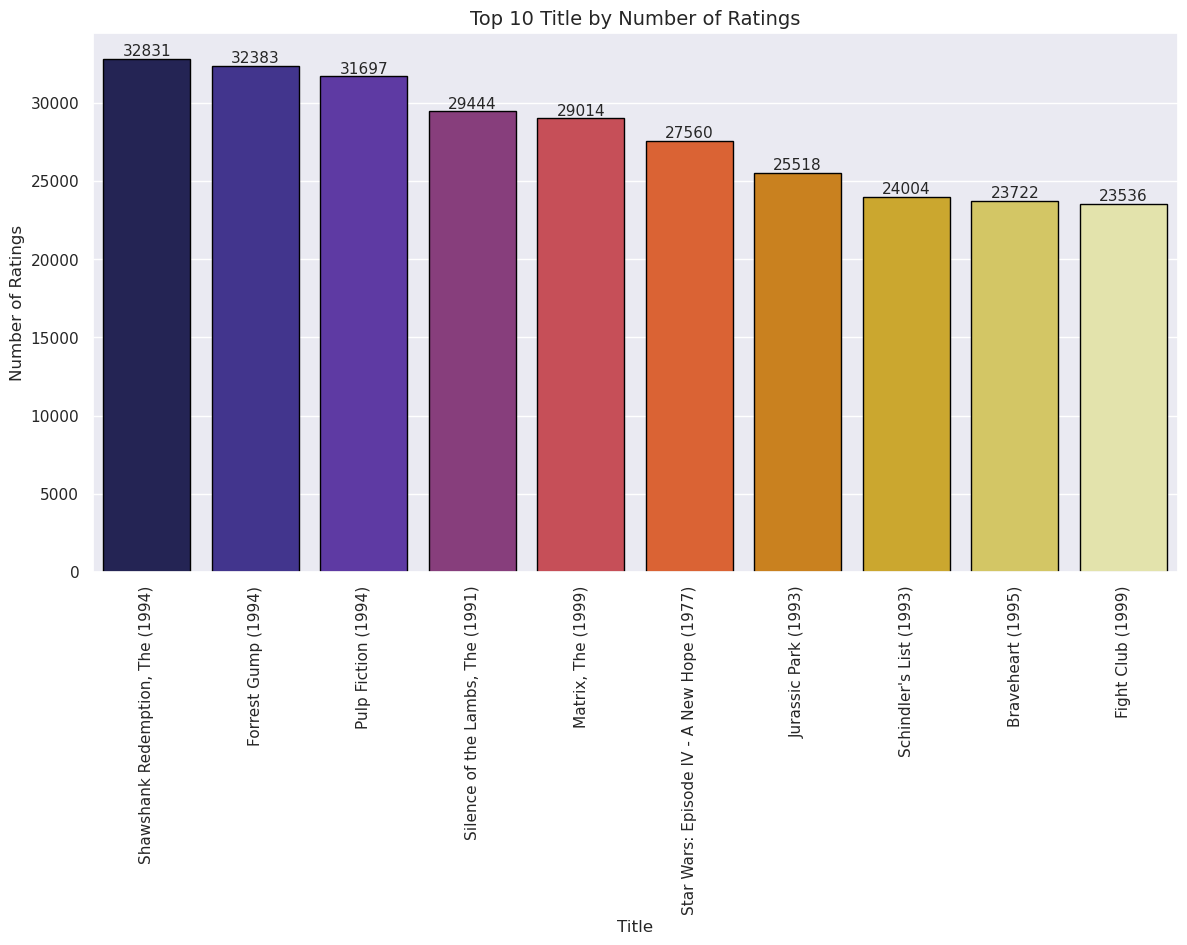

In [25]:
# Get the top ratings of movies

# Define the Function
def top_rating_plot(df,column, n):
    plt.figure(figsize=(14,7))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='CMRmap', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} {column.title()} by Number of Ratings', fontsize=14)
    plt.xlabel(column.title())
    plt.ylabel('Number of Ratings')
    plt.xticks(rotation=90)
    plt.show()
# Call Function; Get Top 10
top_rating_plot(movies,'title',10)

This reveals that all the movies in the top 10 by Number of Ratings were released in the 90's with only one Indicating certain likeness for users to this class of classical movies.


#### comparing the data sets

In [26]:
# Create a Data Frame outlining the size of our data
dataframes = ['train', 'test', 'tags', 'imdb_data',
              'links', 'movies', 'genome_tags', 'genome_scores']
sizes = [len(train), len(test), len(tags),
         len(imdb_data), len(links), len(movies),
         len(genome_tags), len(genome_scores)]
total_size_df = pd.DataFrame(list(zip(dataframes, sizes)),
                             columns=['dataframe', 'sizes'])
total_size_df

,dataframe,sizes
0,train,10000038
1,test,5000019
2,tags,1093360
3,imdb_data,27278
4,links,62423
5,movies,10000038
6,genome_tags,1128
7,genome_scores,15584448


In [27]:
new_row = {'dataframe': 'other', 'sizes': 180530}
total_size_df = total_size_df.append(new_row,
                                     ignore_index=True)
total_size_df

,dataframe,sizes
0,train,10000038
1,test,5000019
2,tags,1093360
3,imdb_data,27278
4,links,62423
5,movies,10000038
6,genome_tags,1128
7,genome_scores,15584448
8,other,180530


In [28]:
print(total_size_df[total_size_df['sizes'] < 70000].sum())

dataframe    imdb_datalinksgenome_tags
sizes        90829                    
dtype: object


In [29]:
# Convert data types to strings for string handling
complt_movie['title_cast'] = complt_movie.title_cast.astype(str)
complt_movie['plot_keywords'] = complt_movie.plot_keywords.astype(str)
complt_movie['genres'] = complt_movie.genres.astype(str)
complt_movie['director'] = complt_movie.director.astype(str)

# Removing spaces between names
complt_movie['director'] = complt_movie['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
complt_movie['title_cast'] = complt_movie['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
complt_movie['title_cast'] = complt_movie['title_cast'].map(lambda x: x.split('|')[:3])

# Discarding the pipes between the plot keywords' and getting only the first five words
complt_movie['plot_keywords'] = complt_movie['plot_keywords'].map(lambda x: x.split('|')[:5])
complt_movie['plot_keywords'] = complt_movie['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
complt_movie['genres'] = complt_movie['genres'].map(lambda x: x.lower().split('|'))
complt_movie['genres'] = complt_movie['genres'].apply(lambda x: " ".join(x))

# Exploring the genres

In [30]:
def wordcloud_generator(df, column):  
    """
    This function extracts all the unique keywords in a column
    and counts the number of times each keyword occurs in the column
    while ignoring words that are not meaningful.
    these keywords are then used to generate a word cloud 
    
    Input: df
           datatype: DataFrame
           column
           datatype: str
           
    Output: wordcloud
            Datatype: None
            
    """
    keyword_counts = {}
    keyword_pair = []
    words = dict()
    
    # list of words that should be ignored
    ignore = ['nan', ' nan', 'nan ', 'seefullsummary', ' seefullsummary', 'seefullsummary ']
    
    # Extract the unique keywords 
    for keyword in [keyword for keyword in df[column] if keyword not in ignore]:
        if keyword in keyword_counts.keys():
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1
     
    # Pair the keywords with their frequencies
    for word,word_freq in keyword_counts.items():
        keyword_pair.append((word,word_freq))
    # Sort the keywords accprding to their frequencies
    keyword_pair.sort(key = lambda x: x[1],reverse=True)
    
    # Make it wordcloud-ready
    for s in keyword_pair:
        words[s[0]] = s[1]
        
    # Create a wordcloud using the top 2000 keywords
    wordcloud = WordCloud(width=800, 
                          height=500, 
                          background_color='black', 
                          max_words=2000,
                          max_font_size=110,
                          scale=3,
                          random_state=0,
                          colormap='Greens').generate_from_frequencies(words)

    return wordcloud 

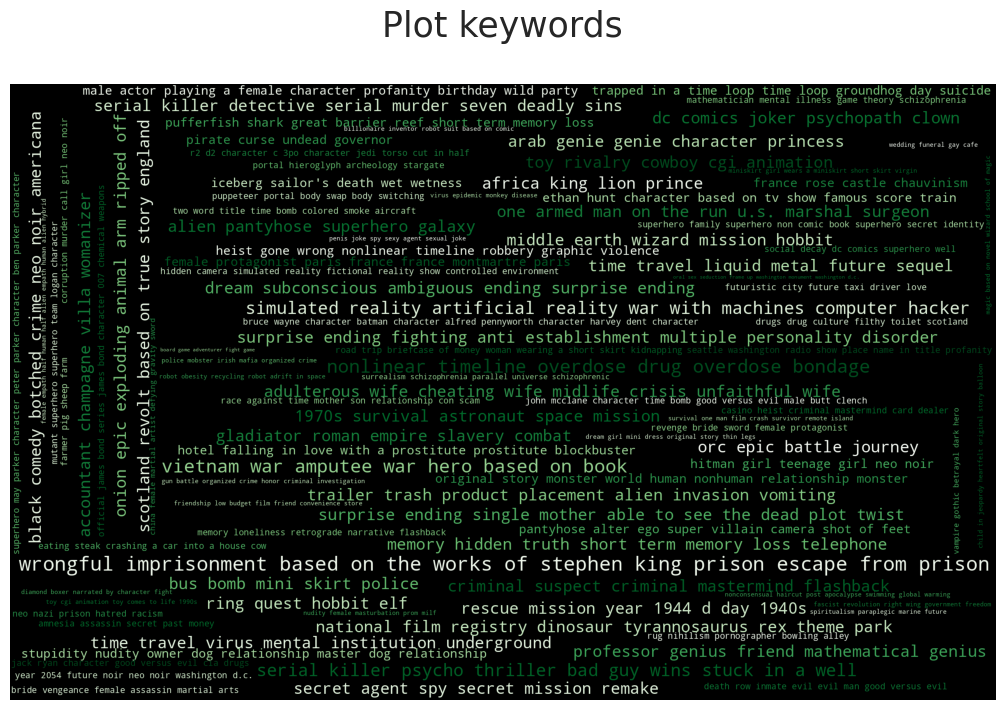

In [31]:
# Plot wordcloud
plot_keywords = wordcloud_generator(complt_movie, 'plot_keywords')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(plot_keywords) 
plt.axis('off') 
plt.title('Plot keywords\n', fontsize=25)
plt.show()

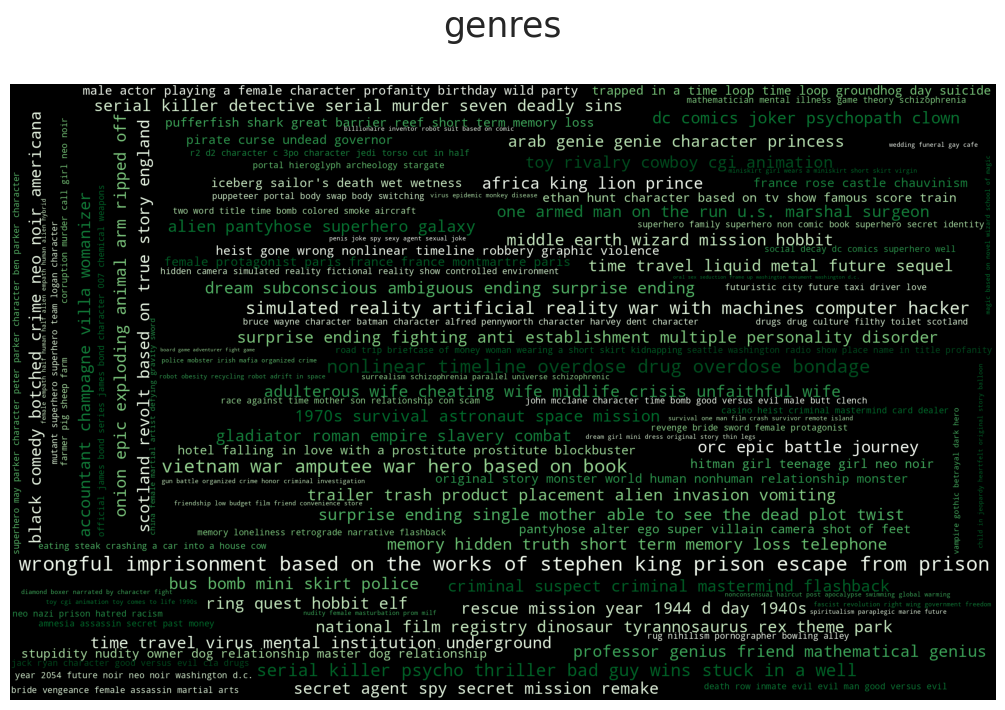

In [32]:
# Plot wordcloud
plot_genres = wordcloud_generator(complt_movie, 'genres')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(plot_keywords) 
plt.axis('off') 
plt.title('genres\n', fontsize=25)
plt.show()

In [33]:
# Get the categories of Movie Genre per movie ID.
# Each Genre should stand unique to enable classification
movie_genres = pd.DataFrame(movies['genres'].str.split("|").tolist(),
                      index=movies['movieId']).stack()
movie_genres = movie_genres.reset_index([0, 'movieId'])
movie_genres.columns = ['movieId', 'Genre']
movie_genres.head()

,movieId,Genre
0,57669,Comedy
1,57669,Crime
2,57669,Drama
3,57669,Thriller
4,5,Comedy


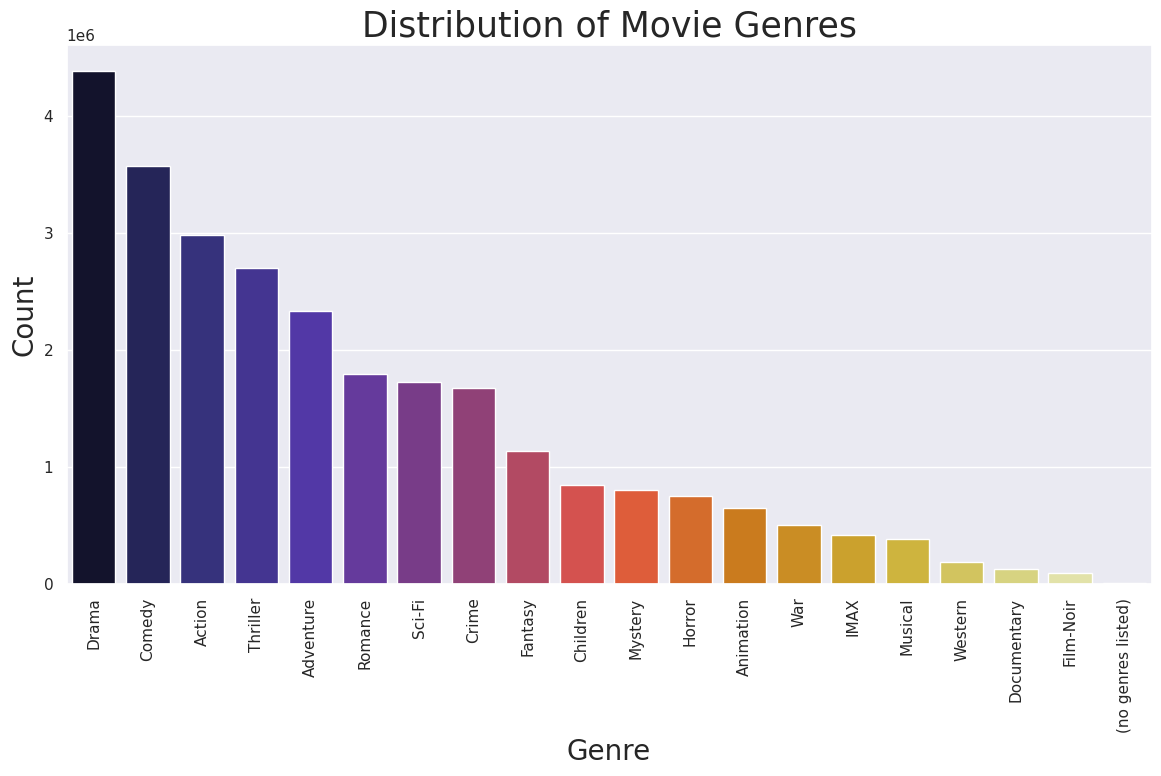

In [34]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='Genre', data=movie_genres, palette='CMRmap',
              order=movie_genres['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

Mere looking at the graph, we can tell that `Drama, Comedy, Thriller and Romance` stand out as the popular movie genres

Several factors attributes to why these genres stand out. Hence, Let us get an interesting wordcloud to showcase movie titles and the count of ratings to see if we could get any further insight on the movies

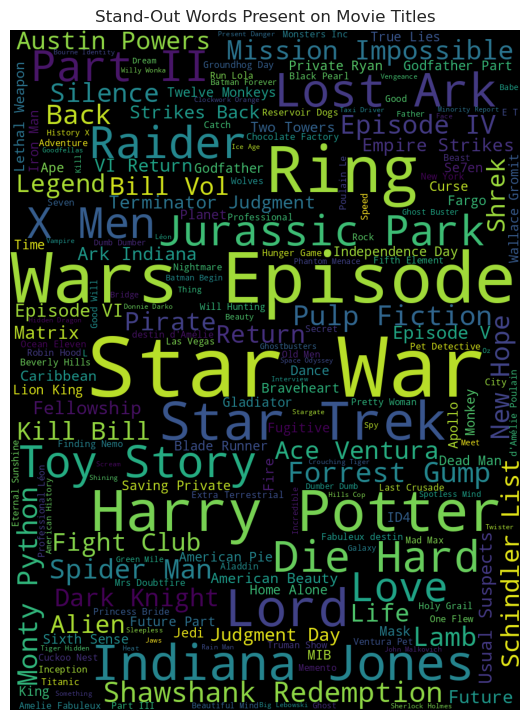

In [35]:
# Wordcloud of movie titles
movie = movies['title'] = movies['title'].astype('str')
wordcloud = ' '.join(movie)
title_wordcloud = WordCloud(stopwords = STOPWORDS,background_color = 'Black',
                            height = 1200, width = 900).generate(wordcloud)
plt.figure(figsize = (14,7), facecolor= 'White')
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Stand-Out Words Present on Movie Titles')
plt.tight_layout(pad=0)
plt.show()

Obviously speaking; This simple means, Movies with words such as `LOVE`, `STORY`, `GIRL`, `MAN`, `NIGHT`, `LIFE`, gains more views and will tend to be rated more than others, and you know why; `SEX CONTENT`. No wonder there have been a marketing drive to paint any and every product with it in the past century. Well, Let's leave it at that. `It simply gets attention.`

#### More on our Time Stamps

You see, Cats hunt mostly at night for some reasons. Same goes for our Viewers, People will choose to watch certain kinds of moovies at certain hours, Day, or Month of the Year. As the saying Goes,` Now your customers, Own the Market`; So let's study the time series activities of our participants.

In [36]:
#From movie data, convert timestamp to datetime
movies['time_dt'] = movies['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

# Extract year, month, day, day-of-week Respectively
movies['Year'] = movies['time_dt'].dt.year
movies['Month'] = movies['time_dt'].dt.month
movies['Day'] = movies['time_dt'].dt.day
movies['Day of Week'] = movies['time_dt'].dt.dayofweek

In [37]:
# View DateTime Columns
movies.head(2)

,userId,movieId,rating,timestamp,title,genres,time_dt,Year,Month,Day,Day of Week
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,2018-02-11 11:53:12,2018,2,11,6
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,2008-03-23 02:18:59,2008,3,23,6


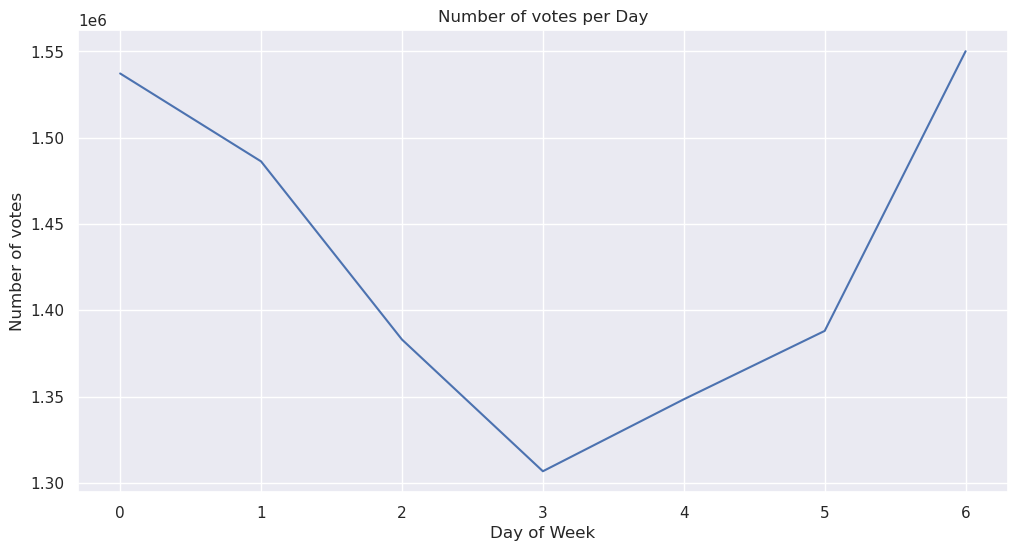

In [38]:
# Group rating by Day-of-Week
dt = movies.groupby(['Day of Week'])['rating'].count().reset_index()
# Make a line Plot of the grouping
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['Day of Week'],dt['rating']); plt.xlabel('Day of Week'); plt.ylabel('Number of votes'); plt.title('Number of votes per Day')
plt.show()

Obviously; People will Tend to View and Rate Movies during the Weekends and if you are planning on making a movie release, Two advices;
* Never on MidWeek
* Target the Weekends

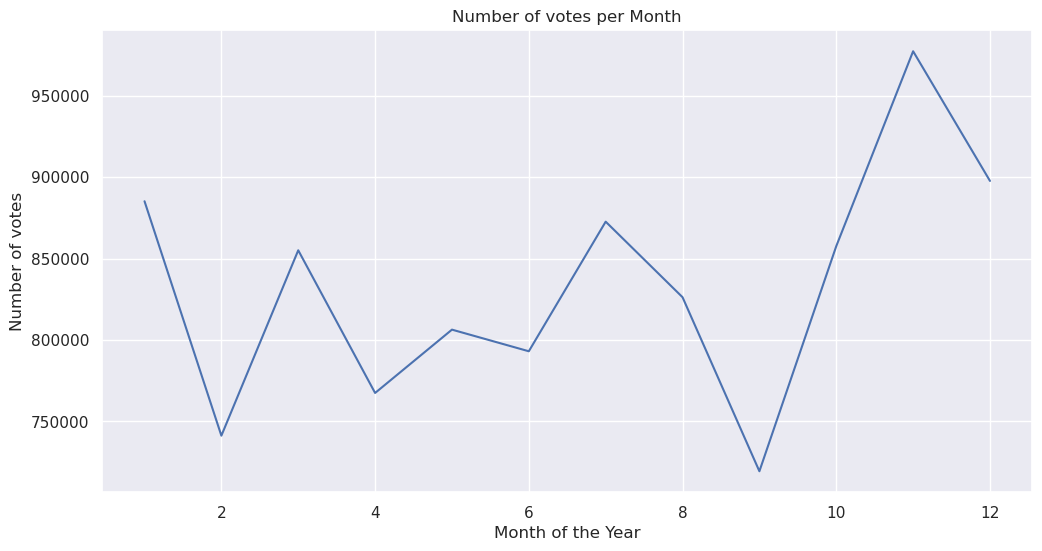

In [39]:
# Group rating by Month
dt = movies.groupby(['Month'])['rating'].count().reset_index()
# Make a line Plot of the grouping
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['Month'],dt['rating']); plt.xlabel('Month of the Year') 
plt.ylabel('Number of votes'); plt.title('Number of votes per Month')
plt.show()

As we can see the `Ember Months` Have alot of people on the look out for Movies, From this analysis we can see a stip decline in votes which is as equal to Views, same for the month of August leading to September (The New Financial Year) and most people will be stock on setting their records straight, reports preparation and all that and might not be a good time for movies. 

We can see the Holiday Periods with the sharp peaks `Easter` and `The Summer break` i.e Students during summer are typically off between eight and nine weeks (late-June to early-September)

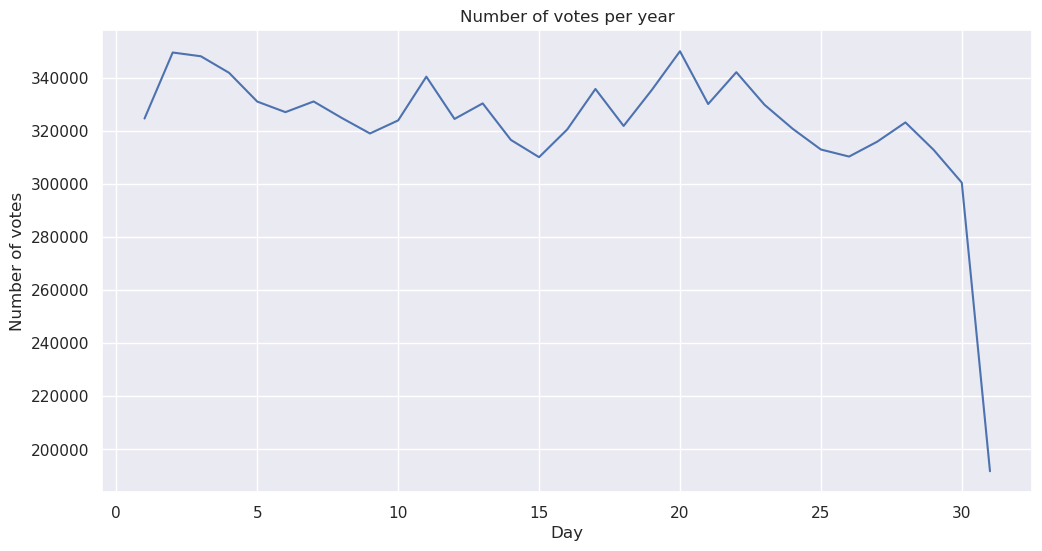

In [40]:
# Group rating by DAY
dt = movies.groupby(['Day'])['rating'].count().reset_index()
# Make a line Plot of the grouping
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dt['Day'],dt['rating']); plt.xlabel('Day'); plt.ylabel('Number of votes'); plt.title('Number of votes per year')
plt.show()

There is a decline in movies viewed late in each months, could correspond with end of Subscription periods and also a period of less money in the hands of salary earners

#### Key Observations 
* RATING range of `3.0` and `5.0` with `4.0` having the highest occurance with over `2.6 Million rating occurance`
* THREE MOST Important Features here are the; `MovieId`, `UserId` and `Rating`, The rest will be built on them.
* A total of `162,541 participant` rated `62,423 unique movies`, out o which `110,010 rated < 50 times`
* You are most likely to get feedbacks from 33% of your Customers
* Possible Outlier of User ID: 72315
* People Tend to Love movies of the 90's or with similar contents.
* `Drama, Comedy, Thriller and Romance` stand out as the popular movie genres
* Titles & Items with Sex Contents proof to get Users attention
* Active periods include `Target the Weekends` and `Holiday sessons`



NOW, Armed with the knowledge of what our data constitute, let's proceed to making meaningful data processing required to accomplish our task.

<a id="five"></a>
## 5. DATA PREPROCESSING
<a href=#cont>Back to Table of Contents</a>

The primary funtion of data processing is to provide Cleaner, Functional, Higher-Quality data, which is key to any successesful of data engineering and model building. It also enable more valuable insights to be extracted as well. Hence, Let's get digging.

Multidimensional scaling (MDS) is a method used to represent the distances between objects on a map, given the known distances between pairs of objects. It provides a visualization that captures the relationships and proximities among the objects in a lower-dimensional space.

In [41]:
def data_scaler(df):
    """
    Scaled data.
    """
    scaler = StandardScaler(with_std=True)
    scaled_data = scaler.fit_transform(df)
    return scaled_data

In [42]:
scaled_genome = data_scaler(genome_scores.sample(frac=0.0001))

In [43]:
tsne = TSNE(3, n_jobs = -1, verbose = 2, perplexity = 10, learning_rate = 0.1)
tsne.fit(scaled_genome)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1558 samples in 0.002s...
[t-SNE] Computed neighbors for 1558 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1558
[t-SNE] Computed conditional probabilities for sample 1558 / 1558
[t-SNE] Mean sigma: 0.100719
[t-SNE] Computed conditional probabilities in 0.026s
[t-SNE] Iteration 50: error = 89.6627502, gradient norm = 0.0001349 (50 iterations in 0.881s)
[t-SNE] Iteration 100: error = 89.6627502, gradient norm = 0.0003316 (50 iterations in 0.716s)
[t-SNE] Iteration 150: error = 89.6627502, gradient norm = 0.0007625 (50 iterations in 0.669s)
[t-SNE] Iteration 200: error = 89.6627502, gradient norm = 0.0018655 (50 iterations in 0.678s)
[t-SNE] Iteration 250: error = 89.6627197, gradient norm = 0.0050999 (50 iterations in 0.642s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.662720
[t-SNE] Iteration 300: error = 4.9870043, gradient norm = 0.0014675 (50 iterations in 0.615s)

TSNE(learning_rate=0.1, n_components=3, n_jobs=-1, perplexity=10, verbose=2)

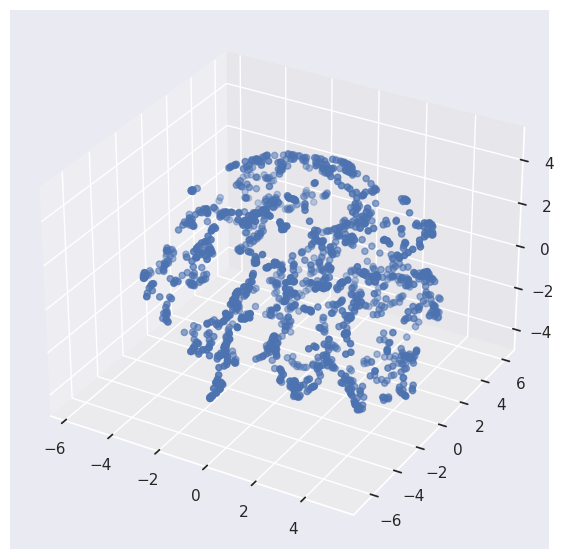

In [44]:
Axes3D

fig = plt.figure(figsize=(14, 7))

# scatter plot
ax = fig.add_subplot(projection='3d')
ax.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1], tsne.embedding_[:,2])
plt.show()

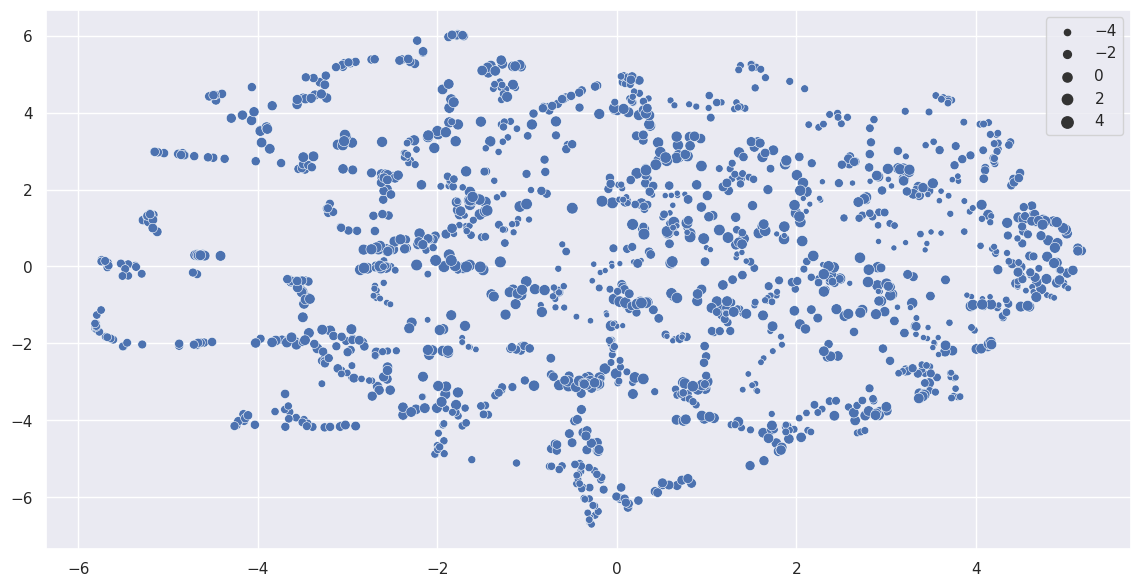

In [45]:
fig = plt.figure(figsize=(14, 7))
sns.scatterplot(x = tsne.embedding_[:,0], y = tsne.embedding_[:,1], size=tsne.embedding_[:,2])
plt.show()

In [46]:
# next we alter the database
dataframe = train.drop(columns='timestamp')

In [ ]:
df_movies = dataframe.set_index('movieId').join([movies[['movieId',
                                                           'genres']]
                                                   .set_index('movieId'),
                                                  imdb_data[['movieId',
                                                         'title_cast',
                                                         'director',
                                                         'plot_keywords']].
                                                   set_index('movieId')],
                                                  how='left').reset_index()
df_movies

In [ ]:
def preprocessor_train(df):
    dataframe = df.copy()

    # now we merge the dataframes
    df_movies = dataframe.set_index('movieId').join([movies_df
                                                       [['movieId', 'genres']].
                                                       set_index('movieId'),
                                                       imbd_data_df[['movieId',
                                                             'title_cast',
                                                             'director',
                                                             'plot_keywords']].
                                                       set_index('movieId')],
                                                      how='left').reset_index()

# now the '(no genre listed)' is equal to  missing value in the column genres

    df_movies['genres'] = ['' if x == '(no genres listed)' else x for x in df_movies['genres']]

    # filling missing values with 'blank'
    df_movies.fillna('', inplace=True)

    for col in df_movies.select_dtypes('object').columns: # selecting 'object' columns

        # removing white space
        df_movies[col] = [''.join(x.split()) for x in df_movies[col]]

        # substituting '|' with a white space
        df_movies[col] = [' '.join(x.split('|')) for x in df_movies[col]]

    # joining the features of interest
    df_movies['corpus'] =  df_movies[df_movies.select_dtypes('object').columns].apply(lambda x: ' '.join(x), axis=1)
    return df_movies[['movieId', 'userId', 'corpus', 'rating']]

In [ ]:
def preprocessor_test(df):
    dataframe_framed = df.copy()

    # Merge
    df_movies = dataframe_framed.set_index('movieId').join([movies_df
                                                       [['movieId', 'genres']].
                                                       set_index('movieId'),
                                                       imbd_data_df[['movieId',
                                                             'title_cast',
                                                             'director',
                                                             'plot_keywords']].
                                                       set_index('movieId')],
                                                      how='left').reset_index()

# now the '(no genre listed)' is equal to  missing value in the column genres

    df_movies['genres'] = ['' if x == '(no genres listed)' else x for x in df_movies['genres']]
        # filling missing values with 'blank'
    df_movies.fillna('', inplace=True)

    for col in df_movies.select_dtypes('object').columns: # selecting 'object' columns

        # removing white space
        df_movies[col] = [''.join(x.split()) for x in df_movies[col]]

        # substituting '|' with a white space
        df_movies[col] = [' '.join(x.split('|')) for x in df_movies[col]]

    # joining the features of interest
    df_movies['corpus'] =  df_movies[df_movies.select_dtypes('object').columns].apply(lambda x: ' '.join(x), axis=1)
    return df_movies[['movieId', 'userId', 'corpus']]

In [ ]:
Test = preprocessor_test(test)

In [ ]:
Train = preprocessor_train(train.drop(columns=['timestamp'])) 

In [ ]:
Train_preprocessor = Train.drop(columns=['rating', 'userId', 'movieId'])
Test_preprocessor = Test.drop(columns=['userId', 'movieId']

<a id="six"></a>
## 6. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

Here we will be carrying out All operations to ensure we feed our model with the required clean and structured data i.e. Generally making ready our data to serves our modelling.

In order to handle the huge dataset, we will be adopting the `Central Limit Theorem (CLT)`, which states that the sampling distribution of the sample means approaches a normal distribution as the sample size is larger. In other words,  the distribution of a sample variable approximates a normal distribution (i.e., a “bell curve”) as the sample size becomes larger, assuming that all samples are identical in size, and regardless of the population's actual distribution shape.

Long story, we will assume our Population distribution size as the full Dataset with over 10 Million observations and going by the rule of thump, statisticians say that a sample size of 30 is sufficient for most distributions. `Hence will be sampling out a representative sample of not less than 30 observations.`

In [ ]:
y = Train['rating']

In [ ]:
cv = CountVectorizer()
train_mat =cv.fit_transform(Test_preprocessor['corpus'])

In [ ]:
Test_mat = cv.transform(Test_preprocessor ['corpus'])

In [ ]:
train_mat.shape

As we can see, we've obtained a representative sample of our dataset having an observation size of `5000019. 

**NEXT:**

let's caculate the similarity between two movies using the tf-idf matrix. The `cosine similarity` is used to calculate the similarity, and `linear_kernel()` class is used to calculate this.

<a id="seven"></a>
# 7. Modeling


In [ ]:
# Load the 1M dataset
train = train.drop('timestamp', axis=1)
train_subset = train[:1000000]
reader = Reader(rating_scale=(train['rating'].min(), train['rating'].max()))
data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

#  models and their predictions

**Non_Negative Matrix Factorization**

The Non-Negative Matrix Factorization (NMF) algorithm leverages principles from multivariate analysis and linear algebra. Its purpose is to break down a given data matrix, represented as M, into the product of two matrices with lower ranks, namely W and H. The sub-matrix W represents the NMF basis, while the sub-matrix H contains the corresponding coefficients.

In [ ]:
nmf_model = NMF(n_epochs=150, n_factors=200, random_state=42,verbose=True)
nmf_model.fit(trainset)
nmf_predictions =nmf_model.test(testset)
nmf_rmse = accuracy.rmse(nmf_predictions)

**Single Value Decomposition**

In [ ]:
svd_model = SVD(n_epochs=150,n_factors=400,init_std_dev=0.01,random_state=42,verbose=True)
svd_model.fit(trainset)
svd_predictions = svd_model.test(testset)
svd_rmse = accuracy.rmse(svd_predictions)

**Co-Clustering model**

In [ ]:
cc_model = CoClustering(n_epochs=150,random_state=42)
cc_model.fit(trainset)
cc_predictions = cc_model.test(testset)
cc_rmse=accuracy.rmse(cc_predictions)

### Model Performance 

Model performance is an assessment of the model's ability to perform a task accurately not only with training data but also in real-time with runtime data when the model is actually deployed through a website or an app.Therefore our streamlit app will also show how our models performed 

We built and tested three different collaborative filtering models and compared their performance using a statistical measure known as the root mean squared error (**RMSE**), which determines the average squared difference between the estimated values and the actual value. A low RMSE value indicates high model accuracy.

### Root Mean Squared Error (RMSE):
$$RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$   

so lets see which model performed better and which model we can try to impprove its performance 

In [ ]:
rmse_scores =[nmf_rmse,cc_rmse,svd_rmse]
trained_models =['NMF','CoClustering','SVD']

model_performance = pd.DataFrame({'model':trained_models,'RMSE':rmse_scores})

In [ ]:
model_performance.sort_values(by='RMSE')

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(data=model_performance.sort_values(by='RMSE'), x='model', y='RMSE', palette="CMRmap", edgecolor="black", ax=ax)
ax.set_xlabel("trained_models")
ax.set_ylabel('rmse_Scores')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),3), fontsize=12, ha="center", va='bottom')
plt.title('Model Accuracy By RMSE Score', fontsize=14)
plt.show()

The table abvove shows the model accuracy by RMSE score that compares the models we have used. Looking at the three models that we used, we can see that Non-Negative Matrix Factorization has the worst performance because it has a high RMSE so we can say that the model wwill not be able to perform a task accurately. 
CoClustering comes as our second best model, it gives a good accuracy score, however Singular value decomposition model gave the best accuracy score as it has the smallest RMSE score 

# [7.Evaluation](#eva) 

* ### [Hyperparameter Tuning](#hype)

Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning

Hyperparameter tuning is an essential part of controlling the behavior of a machine learning model. If we don't correctly tune our hyperparameters, our estimated model parameters produce suboptimal results, as they don't minimize the loss function. This means our model makes more errors

In [ ]:
# Hypertuning Singular Value Decomposition
trainset, testset = train_test_split(data, test_size=0.01, random_state=42)

# Modelling
svd_algo_hyper = SVD(lr_all=0.0085,
                     reg_all=0.01,
                     n_epochs=20,
                     init_std_dev=0.001,
                     random_state= 450)
svd_algo_hyper.fit(trainset)

# Predicting
svd_hyper_predictions = svd_algo_hyper.test(testset)

# Convert the predictions to dataframe
accuracy.rmse(svd_hyper_predictions)

In [ ]:
pred_svd_hyper = [svd_algo_hyper.predict(row.userId,row.movieId) for idx,row in test_df.iterrows()]

# Converting the predictions to a dataframe
test_pred_svd_hyper = pd.DataFrame(pred_svd_hyper)

* [EXPLORE Data Science Academy Resources](https://explore-datascience.net/)
* [GitHub Collab Ref.](https://github.com/2110ACDS-T4/unsupervised-predict-streamlit-template)
* [Commet Collab Ref](https://www.comet.ml/moreira/movie-recommender-systems-team-4/view/new/panels) 
* [Kaggle Collab Ref](https://www.kaggle.com/competitions/edsa-movie-recommendation-2022/overview)
* [How to Build a Movie Recommendation System by Ramya Vidiyala](https://towardsdatascience.com/how-to-build-a-movie-recommendation-system-67e321339109)
* [EDA & Recommendation Model on MovieLens-100K](https://www.kaggle.com/code/amar09/eda-recommendation-model-on-movielens-100k/notebook)
* [Movie Recommender by Yohan Jeong](https://github.com/yjeong5126/movie_recommender/blob/master/content_based_filtering/content_based_recommender.ipynb)
* [In Depth: Gaussian Mixture Models](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb)
* [Investopedia: Central Limit Theorem](https://www.investopedia.com/terms/c/central_limit_theorem.asp#:~:text=Key%20Takeaways-,The%20central%20limit%20theorem%20(CLT)%20states%20that%20the%20distribution%20of,for%20the%20CLT%20to%20hold.)